# Linear Regression Models on Simulated Data
We will create simulated data and fit simple linear regression models to it in this project.
1. Simulate a data set
2. Partition our data into training, testing, and evaluating sets
3. Fit linear regression model using the least squares approach
4. Test polyniminal fit on our data
5. Assess our least square model on testing data set 
6. Repeat the process with less noise data set
7. Repeat the process with more noise data set

## 1. Simulate our data set 

In [17]:
set.seed(6)
x <- rnorm(200, sd = sqrt(1))
head(x, n = 10)

[1]  0.26960598 -0.62998541  0.86865983  1.72719552  0.02418764  0.36802518
 [7] -1.30920430  0.73862193  0.04487299 -1.04839720

In [18]:
eps <- rnorm(200, sd = sqrt(0.25))
head(eps, n = 10)

[1]  0.71105690 -0.37922269 -0.02767146 -0.24022934 -0.46025826 -0.32381437
 [7]  0.25896651  0.73918043 -1.22834203 -0.72472599

In [60]:
y <- -1 + 0.5*x + eps
length(y)
head(y)

[1] 200

[1] -0.1541401 -1.6942154 -0.5933415 -0.3766316 -1.4481644 -1.1398018

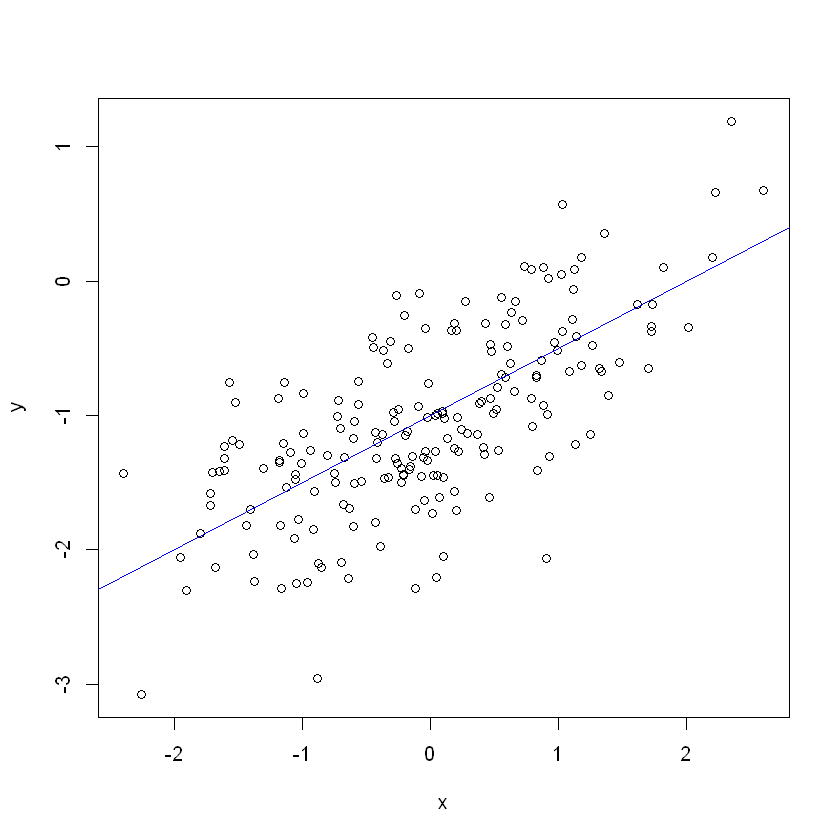

In [28]:
plot(x, y)
abline(-1, 0.5, col = "blue")

## 2. Partitioning our data set into training, testing, and evaluating sets

In [64]:
#Create Data Frame
simulated_data <- data.frame(x = x, y = y)
head(simulated_data)

#Divide data into training, testing, and evaluating
train <- simulated_data[(1:100),]
head(train)

test <- simulated_data[(101:150),]
head(test)

evaluate <- simulated_data[(151:200),]
head(evaluate)

x,y
0.26960598,-0.1541401
-0.62998541,-1.6942154
0.86865983,-0.5933415
1.72719552,-0.3766316
0.02418764,-1.4481644
0.36802518,-1.1398018


x,y
0.26960598,-0.1541401
-0.62998541,-1.6942154
0.86865983,-0.5933415
1.72719552,-0.3766316
0.02418764,-1.4481644
0.36802518,-1.1398018


,x,y
101,-0.94076703,-1.2622976
102,0.09391043,-0.9730664
103,0.06625338,-1.6084318
104,-0.99065612,-1.1348724
105,-0.07211499,-1.4568005
106,-0.22325684,-1.3967976


,x,y
151,0.5251149,-0.7884476
152,-0.5433253,-1.4945594
153,-1.7170191,-1.6678436
154,1.0301166,-0.3709576
155,-1.1471188,-1.2086931
156,-0.2661295,-0.1028108


## 3. Fit linear regression model to our data set 

In [65]:
train_least_squares_fit <- lm(train$y ~ train$x)
summary(train_least_squares_fit)


Call:
lm(formula = train$y ~ train$x)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.5180 -0.2726 -0.0316  0.2730  1.1741 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.04203    0.04973 -20.956  < 2e-16 ***
train$x      0.44983    0.04835   9.303 3.95e-15 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.4972 on 98 degrees of freedom
Multiple R-squared:  0.469,	Adjusted R-squared:  0.4635 
F-statistic: 86.54 on 1 and 98 DF,  p-value: 3.948e-15


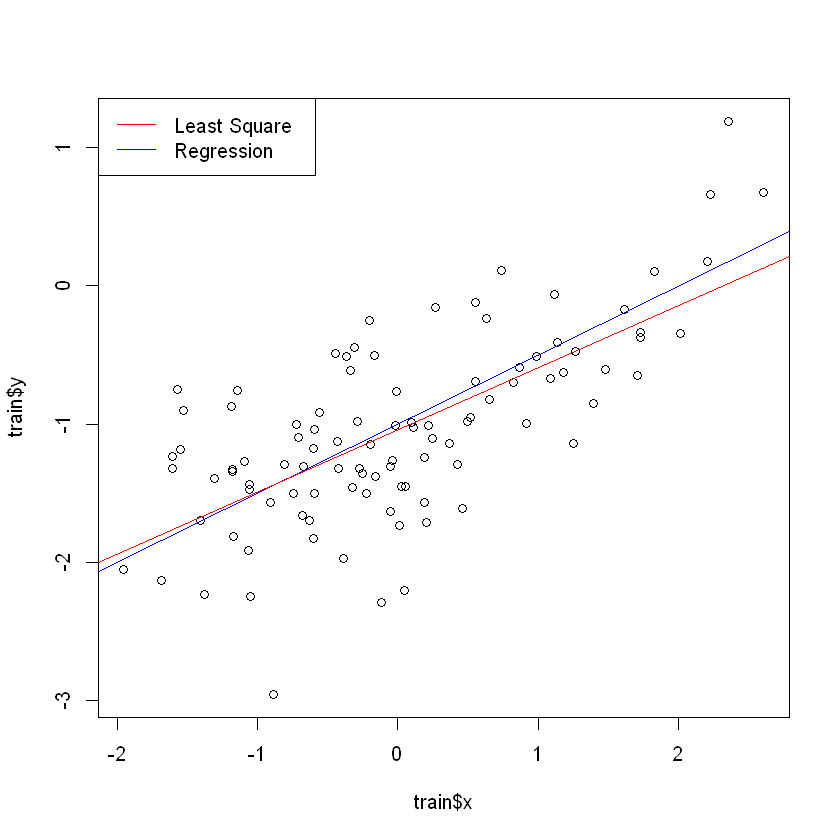

In [66]:
plot(train$x, train$y)
abline(-1, 0.5, col = "blue")
abline(train_least_squares_fit, col = "red")
legend("topleft", c("Least Square", "Regression"), 
        col = c("red", "blue"), lty = c(1,1))

## 4. Test polyniminal fit on our data

In [68]:
poly_fit <- lm(train$y ~ train$x + I(train$x^2))
summary(poly_fit)


Call:
lm(formula = train$y ~ train$x + I(train$x^2))

Residuals:
     Min       1Q   Median       3Q      Max 
-1.53336 -0.28075 -0.00176  0.23252  0.98849 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -1.16714    0.06229 -18.738  < 2e-16 ***
train$x       0.39538    0.04952   7.985 2.89e-12 ***
I(train$x^2)  0.11779    0.03777   3.119  0.00239 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.4765 on 97 degrees of freedom
Multiple R-squared:  0.5174,	Adjusted R-squared:  0.5074 
F-statistic: 51.99 on 2 and 97 DF,  p-value: 4.53e-16


## 5. Assess our least square approach on testing data set

In [72]:
#Predict value of y in testing data set
predict_test <- predict(train_least_squares_fit, test)
head(predict_test)

Warning message:
"'newdata' had 50 rows but variables found have 100 rows"

1          2          3          4          5          6 
-0.9207502 -1.3254121 -0.6512787 -0.2650849 -1.0311464 -0.8764785

## 6. Repeat the process with less noise in the data


Call:
lm(formula = y1 ~ x1)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.69725 -0.18108  0.00161  0.17491  0.68795 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.96734    0.02710  -35.69   <2e-16 ***
x1           0.49972    0.02842   17.59   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.2708 on 98 degrees of freedom
Multiple R-squared:  0.7594,	Adjusted R-squared:  0.7569 
F-statistic: 309.3 on 1 and 98 DF,  p-value: < 2.2e-16


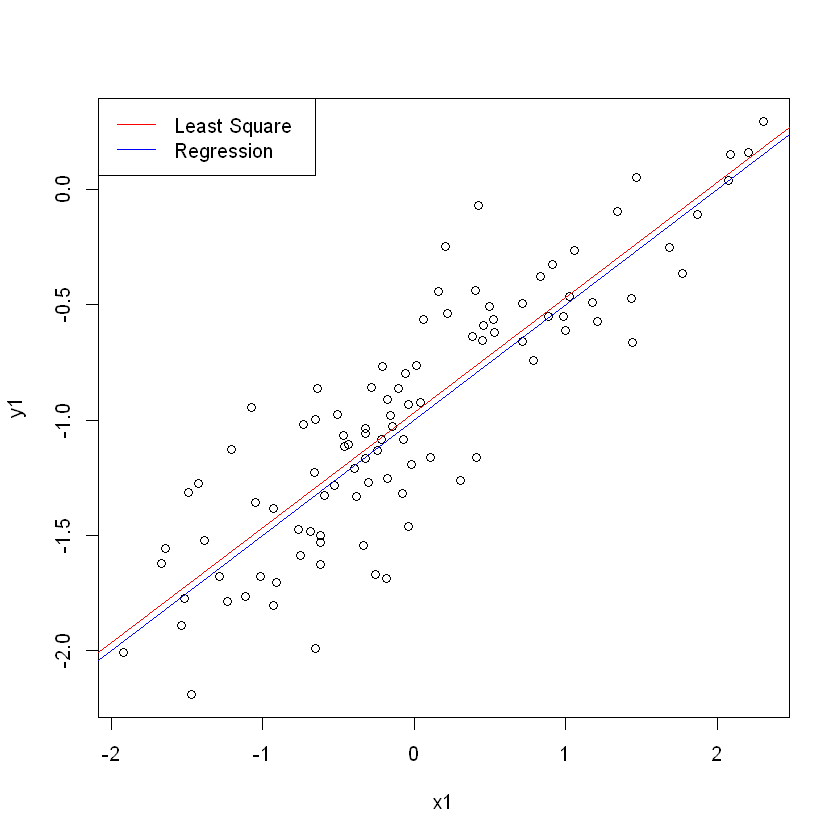

In [50]:
set.seed(1)
eps1 <- rnorm(100, sd = sqrt(0.09))
x1 <- rnorm(100)
y1 <- -1 + 0.5*x1 + eps1

least_squares_fit1 <- lm(y1 ~ x1)
summary(least_squares_fit1)

plot(x1, y1)
abline(-1, 0.5, col = "blue")
abline(least_squares_fit1, col = "red")

legend("topleft", c("Least Square", "Regression"),
        col = c("red", "blue"), lty = c(1, 1))

## Repeat the process with more noise in the data 


Call:
lm(formula = y2 ~ x2)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.72364 -0.44765  0.00397  0.43240  1.70065 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.91927    0.06700 -13.720  < 2e-16 ***
x2           0.49931    0.07025   7.108 1.92e-10 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.6695 on 98 degrees of freedom
Multiple R-squared:  0.3402,	Adjusted R-squared:  0.3334 
F-statistic: 50.52 on 1 and 98 DF,  p-value: 1.922e-10


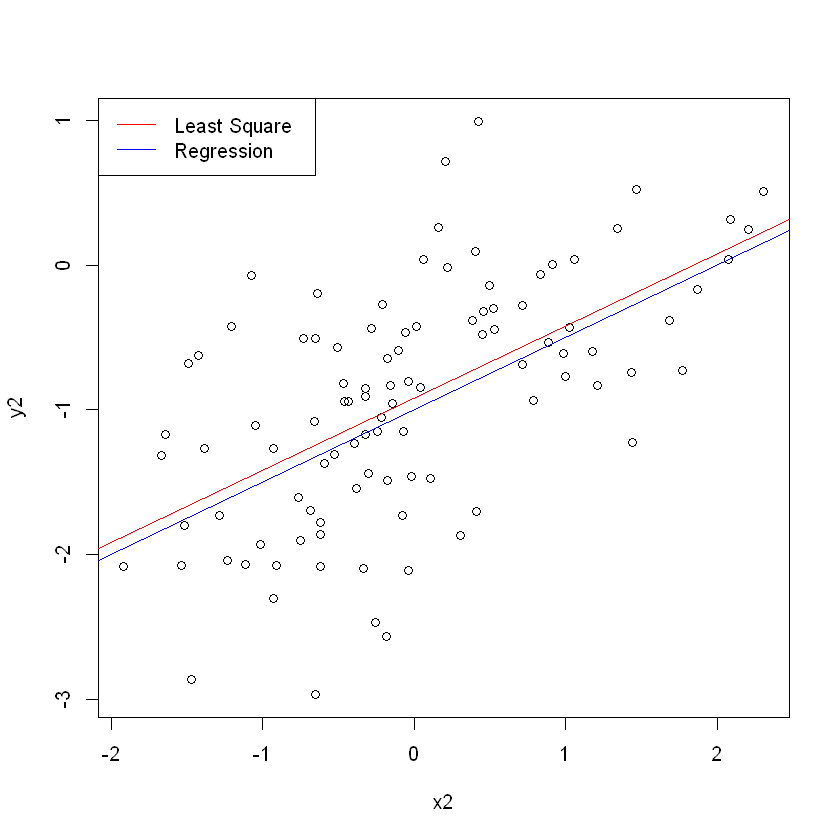

In [51]:
set.seed(1)
eps2 <- rnorm(100, sd = sqrt(0.55))
x2 <- rnorm(100)
y2 <- -1 + 0.5*x2 + eps2

least_squares_fit2 <- lm(y2 ~ x2)
summary(least_squares_fit2)

plot(x2, y2)
abline(-1, 0.5, col = "blue")
abline(least_squares_fit2, col = "red")

legend("topleft", c("Least Square", "Regression"),
        col = c("red", "blue"), lty = c(1, 1))

## Confidence Intervals for the coefficients 3 data sets 

In [52]:
confint(least_squares_fit)

,2.5 %,97.5 %
(Intercept),-1.1025761,-0.9624067
x,0.4032587,0.5472437


In [53]:
confint(least_squares_fit1)

,2.5 %,97.5 %
(Intercept),-1.0211322,-0.9135566
x1,0.4433287,0.5561118


In [55]:
confint(least_squares_fit2)

,2.5 %,97.5 %
(Intercept),-1.0522401,-0.7863061
x2,0.3599049,0.6387122
